   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%   

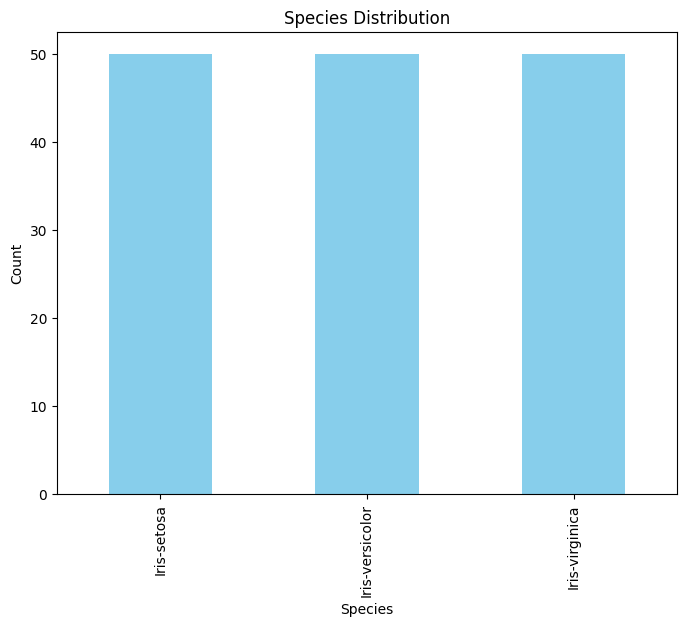

SVM Accuracy: 1.0
SVM Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Perceptron Accuracy: 0.6
Perceptron Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.90      0.95        10
Iris-versicolor       0.43      1.00      0.60         9
 Iris-virginica       0.00      0.00      0.00        11

       accuracy                           0.60        30
      macro avg       0.48      0.63      0.52        30
   weighted avg       0.46      0.60      0.50        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [3]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


# Load the dataset
df = pd.read_csv("/content/Iris.csv")

# Display the first few rows
print(df.head())
# Get a summary of the dataset
description = df.describe()
print(description)
# Get the shape of the dataset
shape = df.shape
print(shape)
import matplotlib.pyplot as plt

# Count the occurrences of each species
species_counts = df['Species'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
species_counts.plot(kind='bar', color='skyblue')
plt.title('Species Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()
X = df.drop(columns=['Species'])
y = df['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC()

# Train the SVM model
svm_model.fit(X_train, y_train)

# Predict the target variable on the test set using SVM
svm_y_pred = svm_model.predict(X_test)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_report = classification_report(y_test, svm_y_pred)

print(f"SVM Accuracy: {svm_accuracy}")
print(f"SVM Classification Report:\n{svm_report}")
from sklearn.linear_model import Perceptron

# Initialize the Perceptron model
perceptron_model = Perceptron()

# Train the Perceptron model
perceptron_model.fit(X_train, y_train)

# Predict the target variable on the test set using Perceptron
perceptron_y_pred = perceptron_model.predict(X_test)

# Evaluate the Perceptron model
perceptron_accuracy = accuracy_score(y_test, perceptron_y_pred)
perceptron_report = classification_report(y_test, perceptron_y_pred)

print(f"Perceptron Accuracy: {perceptron_accuracy}")
print(f"Perceptron Classification Report:\n{perceptron_report}")



In [5]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Define your Logistic Regression class
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, Y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.num_iterations):
            h = self.sigmoid(np.dot(X, self.weights) + self.bias)
            dw = (1 / m) * np.dot(X.T, (h - Y))
            db = (1 / m) * np.sum(h - Y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        h = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_pred = np.where(h > 0.5, 1, 0)
        return y_pred

# Load the dataset
data = pd.read_csv("/content/Iris.csv")

# Map 'Species' to binary classes (1 for versicolor, 0 for others)
data['Species'] = (data['Species'] == 'versicolor').astype(int)

# Separate features (X) and target variable (y)
X = data.drop(columns=['Species'])
y = data['Species']

# Add a column of ones to X for the bias term
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LogisticRegression class
model = LogisticRegression(learning_rate=0.01, num_iterations=1000)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



RIDGE REGRESSION RESULTS:
Mean Squared Error: 0.01866509511677267
Mean Absolute Error: 0.10850514129136148
R-squared: 0.9732931866373682
LASSO REGRESSION RESULTS:
Mean Squared Error: 0.05460485786138713
Mean Absolute Error: 0.18704990682711115
R-squared: 0.9218690428056464
k-NN REGRESSION RESULTS:
Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R-squared: 1.0


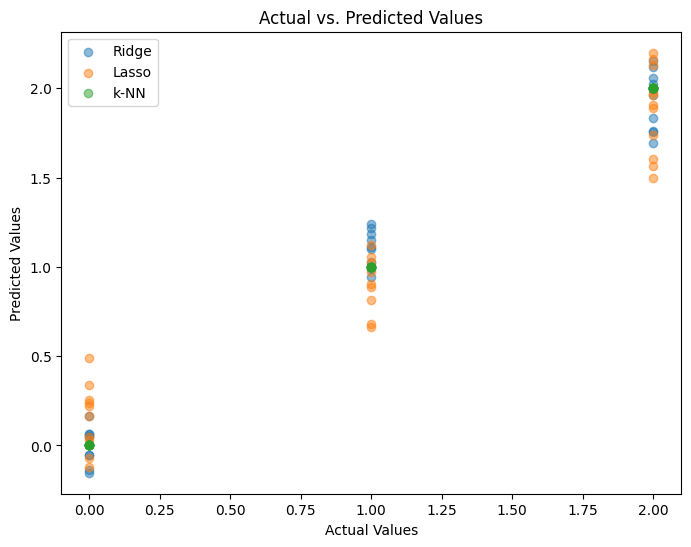

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load your regression dataset (replace 'your_dataset.csv' with your dataset's file path)
df = pd.read_csv('/content/Iris.csv')

# Encode the 'Species' column into numerical values
df['Species'] = df['Species'].astype('category').cat.codes

# Prepare the data: X should contain the features, and y should contain the target variable.
X = df.drop(columns=['Species'])  # Adjust the target column name
y = df['Species']  # Adjust the target column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge = Ridge(alpha=1.0)  # You can adjust the alpha parameter for Ridge regularization
ridge.fit(X_train, y_train)
ridge_y_pred = ridge.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=1.0)  # You can adjust the alpha parameter for Lasso regularization
lasso.fit(X_train, y_train)
lasso_y_pred = lasso.predict(X_test)

# k-NN Regression
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

# Calculate Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R²)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_mae = mean_absolute_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_mae = mean_absolute_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)

knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_mae = mean_absolute_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)

# Print regression results
print("RIDGE REGRESSION RESULTS:")
print(f"Mean Squared Error: {ridge_mse}")
print(f"Mean Absolute Error: {ridge_mae}")
print(f"R-squared: {ridge_r2}")

print("LASSO REGRESSION RESULTS:")
print(f"Mean Squared Error: {lasso_mse}")
print(f"Mean Absolute Error: {lasso_mae}")
print(f"R-squared: {lasso_r2}")

print("k-NN REGRESSION RESULTS:")
print(f"Mean Squared Error: {knn_mse}")
print(f"Mean Absolute Error: {knn_mae}")
print(f"R-squared: {knn_r2}")

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ridge_y_pred, label='Ridge', alpha=0.5)
plt.scatter(y_test, lasso_y_pred, label='Lasso', alpha=0.5)
plt.scatter(y_test, knn_y_pred, label='k-NN', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()
